In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'P_50_T_250',
                          'min_5.e-24_max_1.e-18_ng_7',
                          'wgt_0_0_0_0_0_0_0',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band02_wn_340_540',
                               'P_50_T_250',
                               'min_5.e-24_max_1.e-18_ng_7',
                               'wgt_0_0_0_0_0_0_0',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7, ]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [13]:
for g in [1, 2, 3, 4, 5, 6, 7,]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

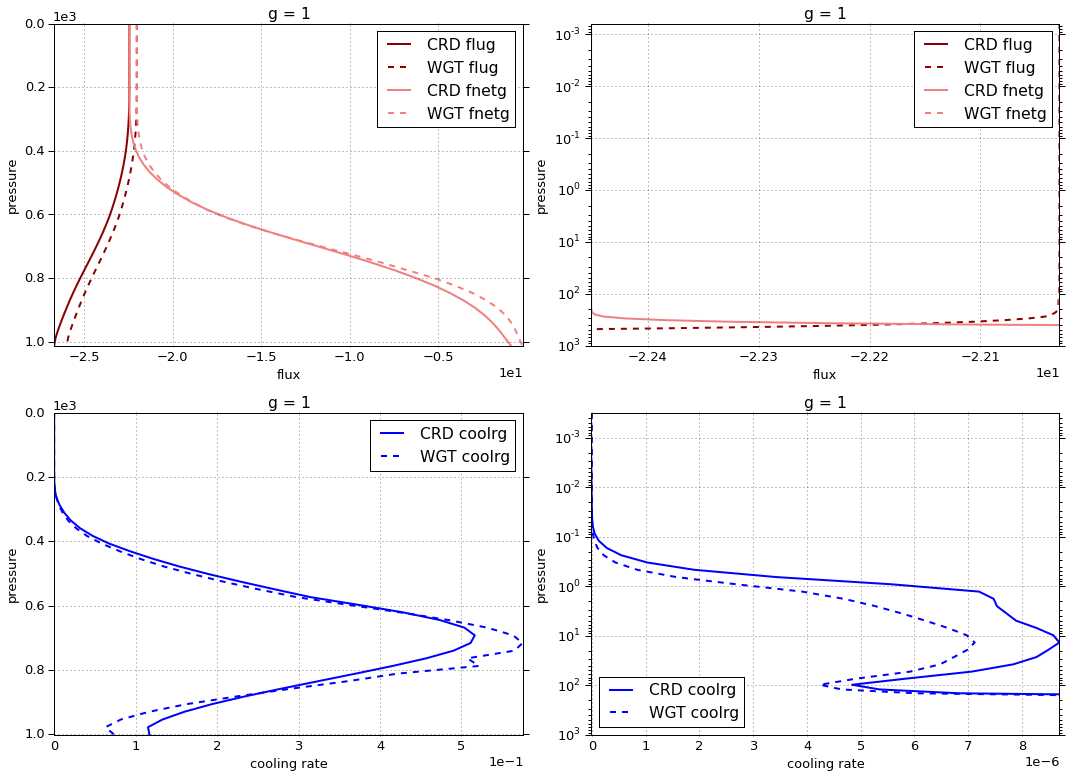

# Figure: flux, cooling rate. g-group 2

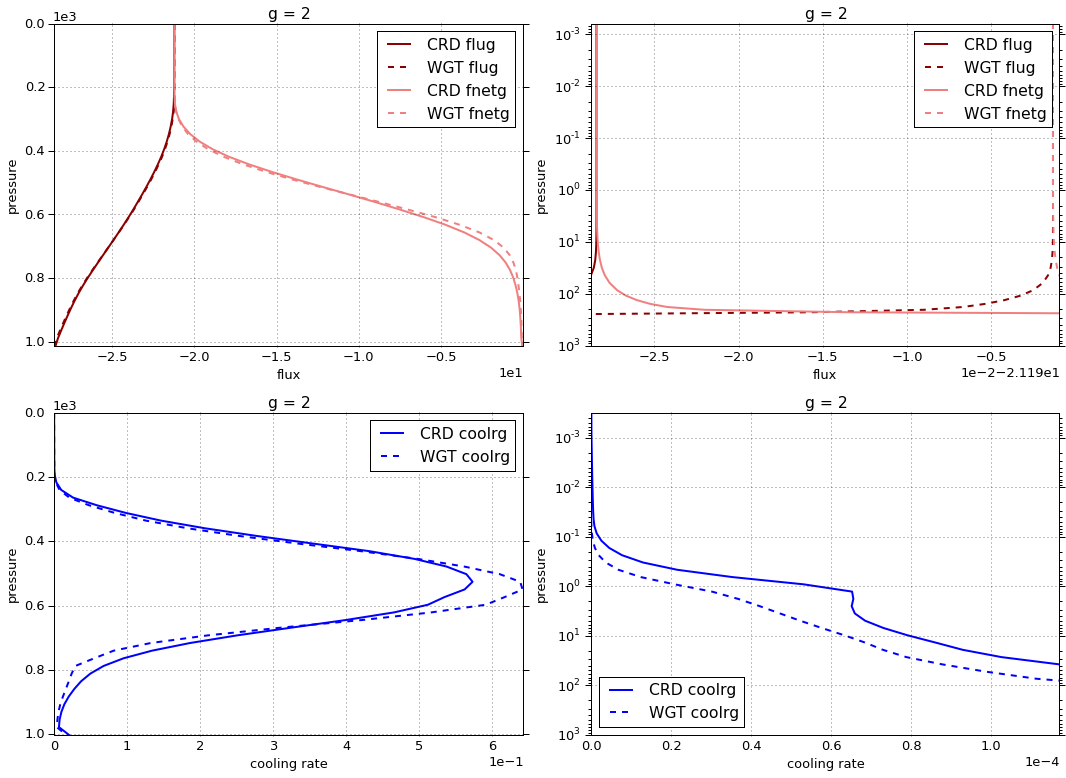

# Figure: flux, cooling rate. g-group 3

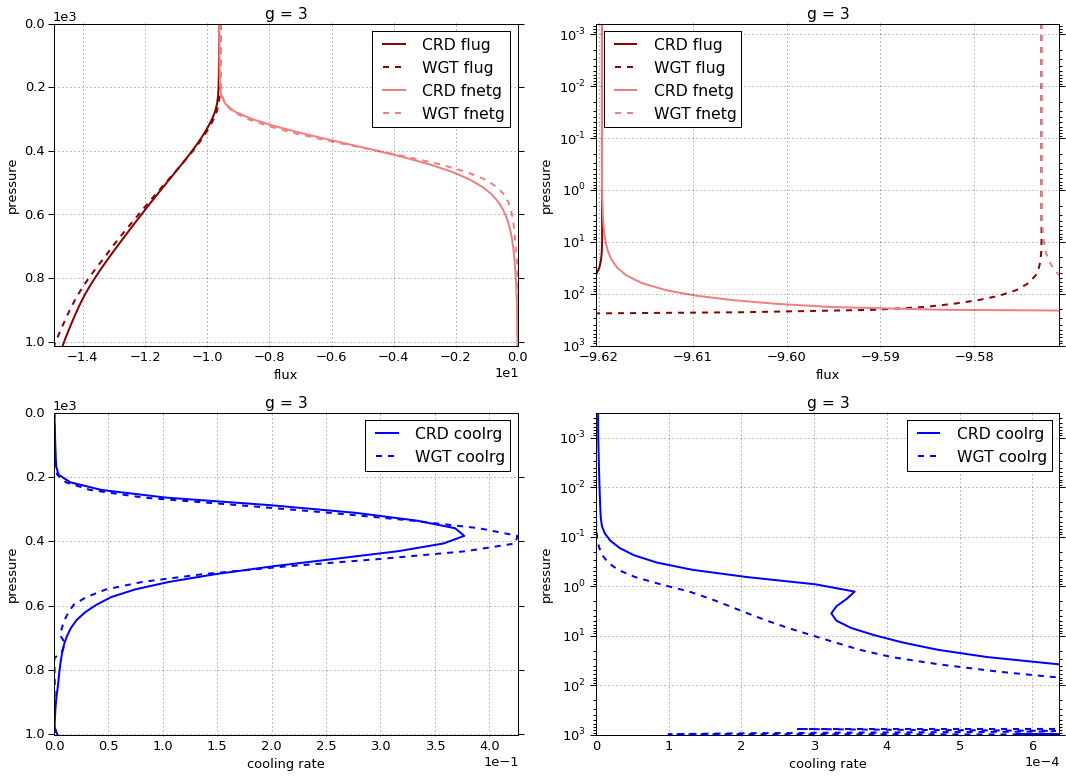

# Figure: flux, cooling rate. g-group 4

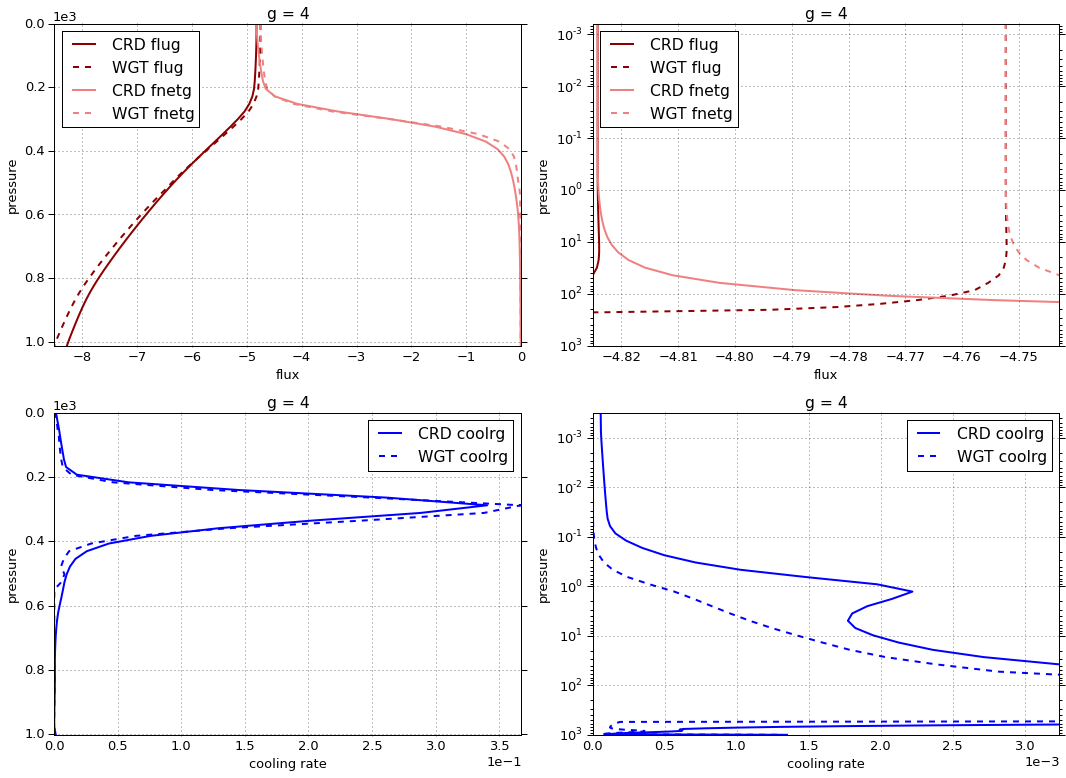

# Figure: flux, cooling rate. g-group 5

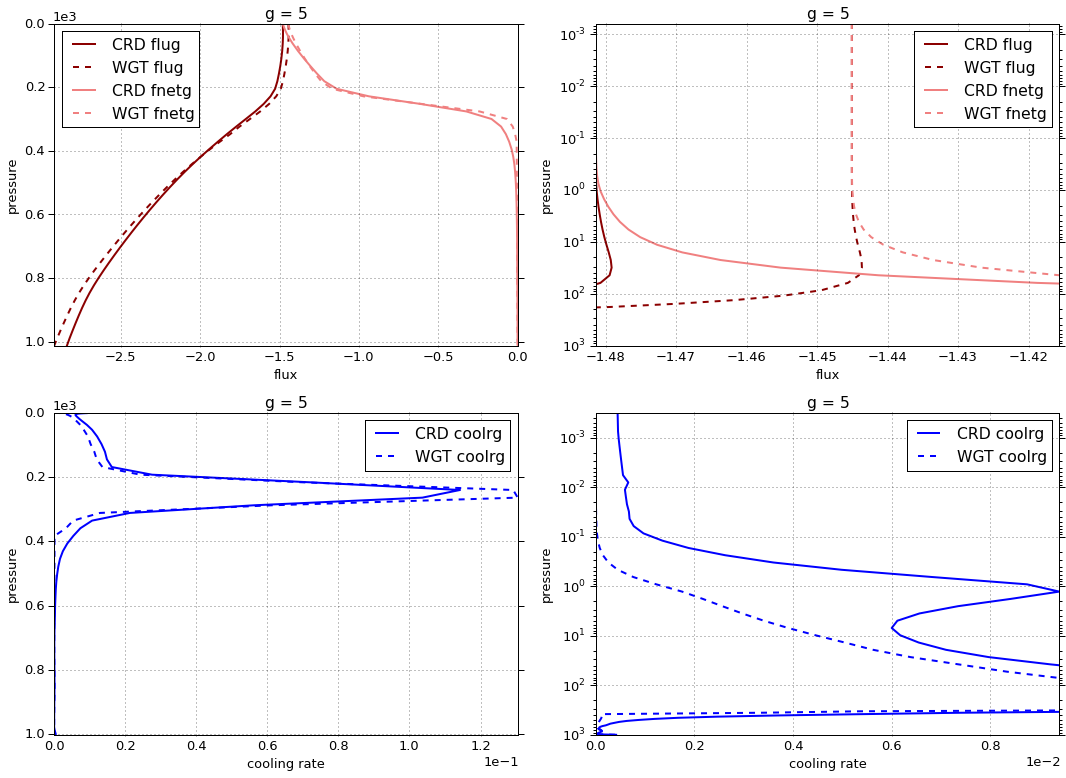

# Figure: flux, cooling rate. g-group 6

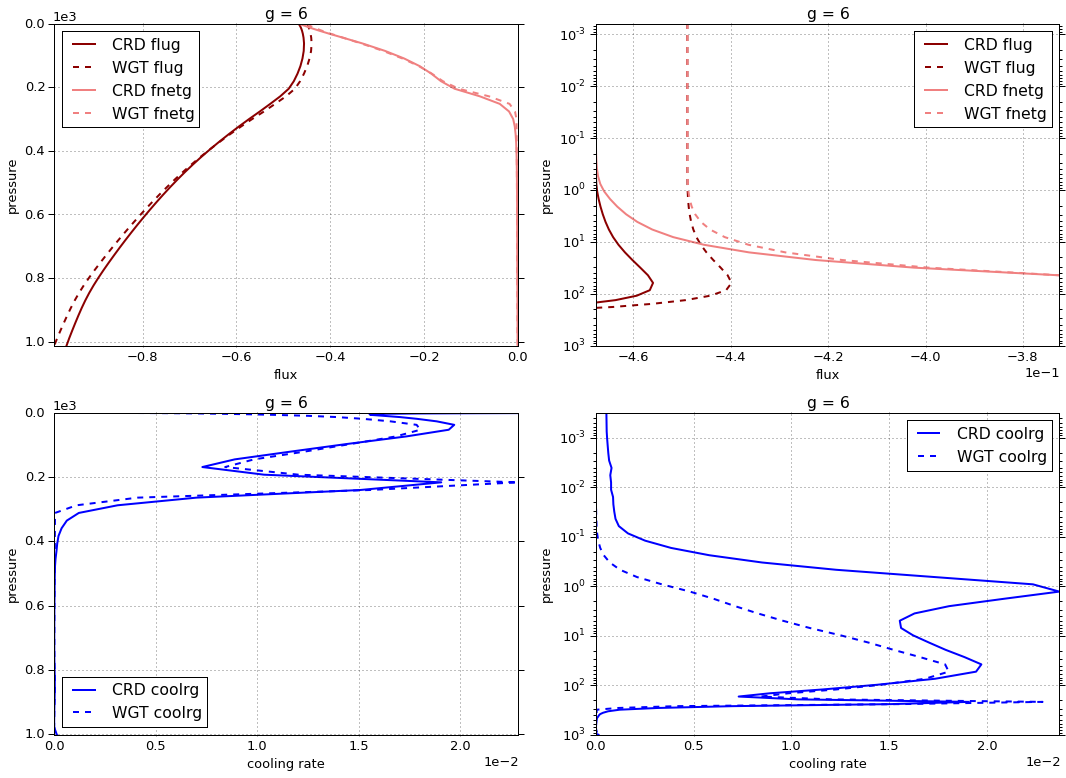

# Figure: flux, cooling rate. g-group 7

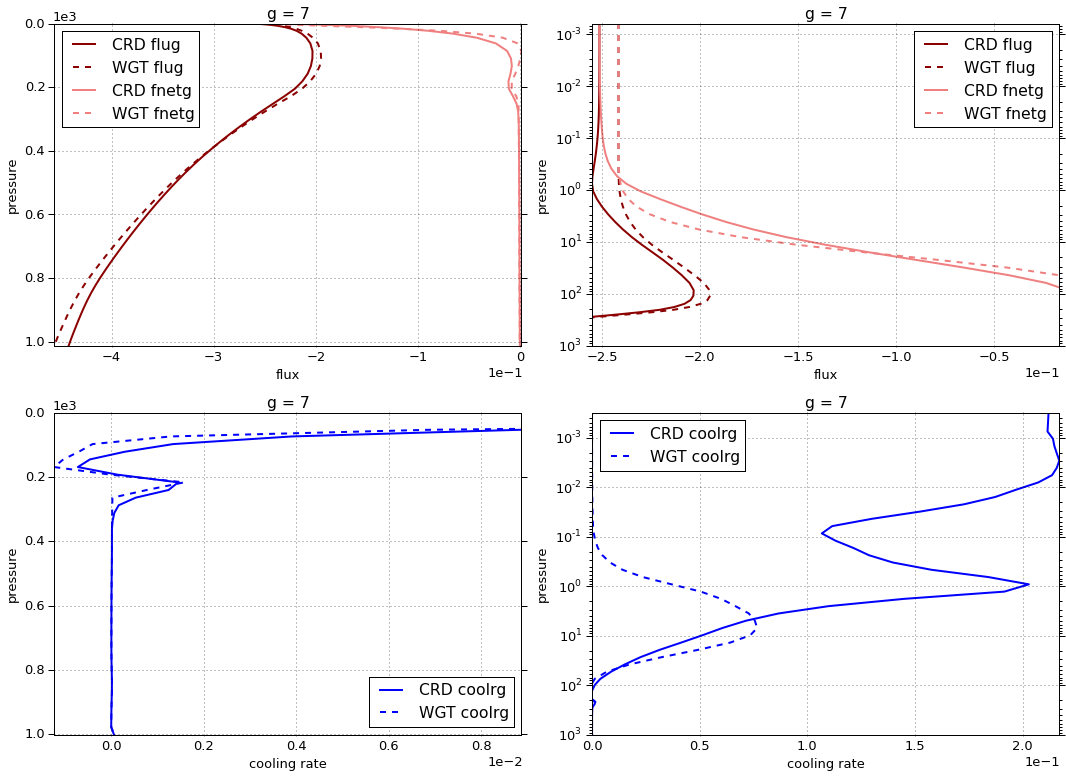

# Figure: flux, cooling rate. g-group total

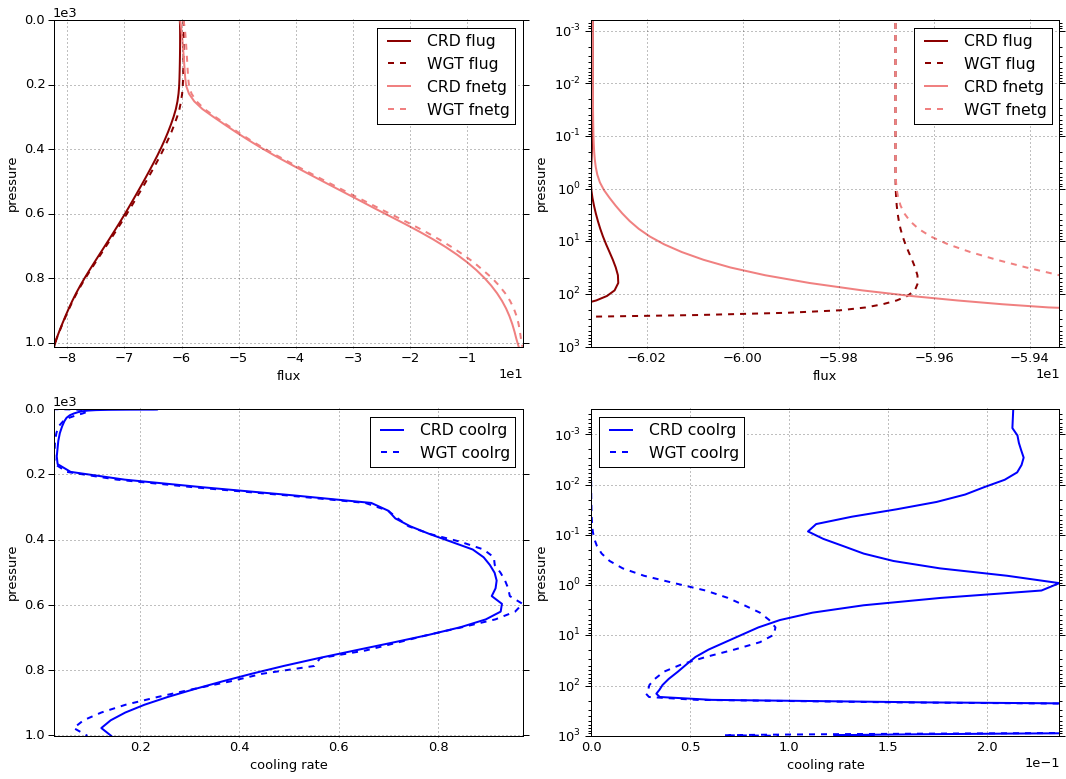

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0        1     -22.450929   0.000000 -22.450929
  1013     76    -26.696714  25.805304  -0.891410
2 0        1     -21.218432   0.000000 -21.218432
  1013     76    -28.436066  28.375709  -0.060357
3 0        1      -9.619645   0.000000  -9.619645
  1013     76    -14.656019  14.646782  -0.009238
4 0        1      -4.824173   0.000000  -4.824173
  1013     76     -8.282426   8.278689  -0.003737
5 0        1      -1.481400   0.000000  -1.481400
  1013     76     -2.840067   2.838924  -0.001143
6 0        1      -0.467678   0.000000  -0.467678
  1013     76     -0.962431   0.962045  -0.000386
7 0        1      -0.251300   0.000000  -0.251300
  1013     76     -0.442107   0.441932  -0.000175


WGT


flug       fldg      fnetg
g pressure level                                 
1 0        1     -22.028981   0.000000 -22.028981
  1013     76    -25.983127  25.738267  -0.244861
2 0        1     -21.191352   0.000000 -21.191352
  1013     76    -28.522226  28.479958  -0.042268
3 0        1      -9.572876   0.000000  -9.572876
  1013     76    -14.930816  14.924436  -0.006381
4 0        1      -4.752320   0.000000  -4.752320
  1013     76     -8.514579   8.510940  -0.003639
5 0        1      -1.445079   0.000000  -1.445079
  1013     76     -2.920128   2.918880  -0.001248
6 0        1      -0.448892   0.000000  -0.448892
  1013     76     -0.988680   0.988257  -0.000423
7 0        1      -0.241603   0.000000  -0.241603
  1013     76     -0.456274   0.456079  -0.000195


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.421948  0.000000  0.421948
  1013     76     0.713587 -0.067037  0.646549
2 0        1      0.027080  0.000000  0.027080
  1013     76    -0.086160  0.104249  0.018089
3 0        1      0.046769  0.000000  0.046769
  1013     76    -0.274797  0.277654  0.002857
4 0        1      0.071853  0.000000  0.071853
  1013     76    -0.232153  0.232251  0.000098
5 0        1      0.036321  0.000000  0.036321
  1013     76    -0.080061  0.079956 -0.000105
6 0        1      0.018786  0.000000  0.018786
  1013     76    -0.026249  0.026213 -0.000036
7 0        1      0.009697  0.000000  0.009697
  1013     76    -0.014166  0.014147 -0.000020

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.719567e-08
  1001.112500 75     1.169912e-01
2 0.000312    1      1.086498e-07
  1001.112500 75     2.027322e-02
3 0.000312    1      3.150483e-06
  1001.112500 75     3.152404e-03
4 0.000312    1      5.569167e-05
  1001.112500 75     1.349626e-03
5 0.000312    1      4.427835e-04
  1001.112500 75     4.129299e-04
6 0.000312    1      5.428143e-04
  1001.112500 75     1.395201e-04
7 0.000312    1      2.119855e-01
  1001.112500 75     6.336620e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1      4.803261e-11
  1001.112500 75     7.379764e-02
2 0.000312    1      3.362282e-10
  1001.112500 75     1.645497e-02
3 0.000312    1      1.681141e-09
  1001.112500 75     2.304258e-03
4 0.000312    1      1.039906e-08
  1001.112500 75     1.314046e-03
5 0.000312    1      3.037162e-08
  1001.112500 75     4.506604e-04
6 0.000312    1      3.924339e-08
  1001.112500 75     1.525820e-04
7 0.000312    1      7.879074e-08
  1001.112500 75     7.041625e-05


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.724371e-08
  1001.112500 75    -4.319354e-02
2 0.000312    1     -1.083135e-07
  1001.112500 75    -3.818255e-03
3 0.000312    1     -3.148802e-06
  1001.112500 75    -8.481467e-04
4 0.000312    1     -5.568127e-05
  1001.112500 75    -3.558000e-05
5 0.000312    1     -4.427531e-04
  1001.112500 75     3.773048e-05
6 0.000312    1     -5.427751e-04
  1001.112500 75     1.306189e-05
7 0.000312    1     -2.119854e-01
  1001.112500 75     7.050045e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-60.313556,0.000000,-60.313556
1013,76,-82.315830,81.349384,-0.966445



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-59.681103,0.000000,-59.681103
1013,76,-82.315829,82.016817,-0.299013



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,6.324530e-01,0.000000,0.632453
1013,76,4.500000e-07,0.667433,0.667433


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213030
1001.112500,75,0.142382



WGT


,,coolrg
pressure,layer,
0.000312,1,1.608702e-07
1001.112500,75,9.454457e-02



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.213030
1001.112500,75,-0.047838


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.308150,0.315652
2,0.345775,0.346497
3,0.185100,0.181385
4,0.106400,0.103438
5,0.036500,0.035475
6,0.012350,0.012011
7,0.005725,0.005543


In [17]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -22.450929  0.000000e+00 -22.450929   1     1   
0.000624      1     2 -22.450929  5.785594e-12 -22.450929   1     2   
0.000876      1     3 -22.450929  8.152897e-12 -22.450929   1     3   
0.001229      1     4 -22.450929  1.156263e-11 -22.450929   1     4   
0.001723      1     5 -22.450929  1.649140e-11 -22.450929   1     5   
0.002417      1     6 -22.450929  2.361425e-11 -22.450929   1     6   
0.003391      1     7 -22.450929  3.392621e-11 -22.450929   1     7   
0.004757      1     8 -22.450929  4.889770e-11 -22.450929   1     8   
0.006672      1     9 -22.450929  7.070200e-11 -22.450929   1     9   
0.009359      1    10 -22.450929  1.026070e-10 -22.450929   1    10   
0.013128      1    11 -22.450929  1.495729e-10 -22.450929   1    11   
0.018415      1    12 -22.450929  2.192363e-10 -22.450929   1    12   
0.025830      1    13 -22.450929  3.236249e-10 -22.450929   1    13   
0.036232      1    14 -22.450929  4.821072e-10 -22.450929   1    14   
0.050823      1    15 -22.450929  7.278408e-10 -22.450929   1    15   
0.071291      1    16 -22.450929  1.136307e-09 -22.450929   1    16   
0.100000      1    17 -22.450929  1.912699e-09 -22.450929   1    17   
0.140271      1    18 -22.450929  3.546266e-09 -22.450929   1    18   
0.196760      1    19 -22.450929  7.098342e-09 -22.450929   1    19   
0.275997      1    20 -22.450929  1.496945e-08 -22.450929   1    20   
0.387100      1    21 -22.450929  3.268483e-08 -22.450929   1    21   
0.543100      1    22 -22.450929  7.315091e-08 -22.450929   1    22   
0.761700      1    23 -22.450929  1.659024e-07 -22.450929   1    23   
1.068500      1    24 -22.450929  3.657656e-07 -22.450928   1    24   
1.498800      1    25 -22.450929  7.210418e-07 -22.450928   1    25   
2.102400      1    26 -22.450929  1.258214e-06 -22.450927   1    26   
2.949000      1    27 -22.450929  2.069269e-06 -22.450927   1    27   
4.136600      1    28 -22.450929  3.331537e-06 -22.450926   1    28   
5.802500      1    29 -22.450929  5.354693e-06 -22.450924   1    29   
8.139200      1    30 -22.450930  8.683723e-06 -22.450922   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -22.509449  1.244829e-01 -22.384966   1    47   
347.300000    1    48 -22.541831  2.148179e-01 -22.327013   1    48   
371.075000    1    49 -22.583273  3.459767e-01 -22.237296   1    49   
394.850000    1    50 -22.634947  5.307859e-01 -22.104161   1    50   
418.625000    1    51 -22.697876  7.835487e-01 -21.914327   1    51   
442.400000    1    52 -22.772923  1.120336e+00 -21.652588   1    52   
466.175000    1    53 -22.858994  1.548747e+00 -21.310246   1    53   
489.950000    1    54 -22.955571  2.077957e+00 -20.877614   1    54   
513.725000    1    55 -23.062710  2.719610e+00 -20.343100   1    55   
537.500000    1    56 -23.180252  3.483466e+00 -19.696786   1    56   
561.275000    1    57 -23.307771  4.375351e+00 -18.932420   1    57   
585.050000    1    58 -23.444449  5.397686e+00 -18.046764   1    58   
608.825000    1    59 -23.596415  6.599279e+00 -16.997136   1    59   
632.600000    1    60 -23.763895  7.973458e+00 -15.790437   1    60   
656.375000    1    61 -23.945521  9.488464e+00 -14.457057   1    61   
680.150000    1    62 -24.139695  1.110119e+01 -13.038501   1    62   
703.925000    1    63 -24.344394  1.275996e+01 -11.584435   1    63   
727.700000    1    64 -24.557294  1.441241e+01 -10.144885   1    64   
751.475000    1    65 -24.775630  1.601159e+01  -8.764041   1    65   
775.250000    1    66 -24.995920  1.751839e+01  -7.477535   1    66   
799.025000    1    67 -25.213979  1.890678e+01  -6.307195   1    67   
822.800000    1    68 -25.425329  2.016104e+01  -5.264286   1    68   
846.575000    1    69 -25.626534  2.

In [18]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      2     1 -21.218432  0.000000e+00 -21.218432   2     1   
0.000624      2     2 -21.218432  1.321534e-10 -21.218432   2     2   
0.000876      2     3 -21.218432  1.860404e-10 -21.218432   2     3   
0.001229      2     4 -21.218432  2.631332e-10 -21.218432   2     4   
0.001723      2     5 -21.218432  3.738118e-10 -21.218432   2     5   
0.002417      2     6 -21.218432  5.327710e-10 -21.218432   2     6   
0.003391      2     7 -21.218432  7.612517e-10 -21.218432   2     7   
0.004757      2     8 -21.218432  1.089917e-09 -21.218432   2     8   
0.006672      2     9 -21.218432  1.563196e-09 -21.218432   2     9   
0.009359      2    10 -21.218432  2.245757e-09 -21.218432   2    10   
0.013128      2    11 -21.218432  3.232137e-09 -21.218432   2    11   
0.018415      2    12 -21.218432  4.661545e-09 -21.218432   2    12   
0.025830      2    13 -21.218432  6.740749e-09 -21.218432   2    13   
0.036232      2    14 -21.218432  9.780842e-09 -21.218432   2    14   
0.050823      2    15 -21.218432  1.427655e-08 -21.218432   2    15   
0.071291      2    16 -21.218432  2.130561e-08 -21.218432   2    16   
0.100000      2    17 -21.218432  3.368266e-08 -21.218432   2    17   
0.140271      2    18 -21.218432  5.759104e-08 -21.218432   2    18   
0.196760      2    19 -21.218432  1.051948e-07 -21.218432   2    19   
0.275997      2    20 -21.218432  2.017693e-07 -21.218431   2    20   
0.387100      2    21 -21.218432  4.010144e-07 -21.218431   2    21   
0.543100      2    22 -21.218432  8.191847e-07 -21.218431   2    22   
0.761700      2    23 -21.218432  1.703003e-06 -21.218430   2    23   
1.068500      2    24 -21.218432  3.475850e-06 -21.218428   2    24   
1.498800      2    25 -21.218431  6.467028e-06 -21.218425   2    25   
2.102400      2    26 -21.218431  1.080094e-05 -21.218420   2    26   
2.949000      2    27 -21.218431  1.707030e-05 -21.218414   2    27   
4.136600      2    28 -21.218431  2.646102e-05 -21.218404   2    28   
5.802500      2    29 -21.218432  4.106648e-05 -21.218391   2    29   
8.139200      2    30 -21.218435  6.459259e-05 -21.218370   2    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    2    47 -21.436723  7.773107e-01 -20.659412   2    47   
347.300000    2    48 -21.545465  1.298266e+00 -20.247199   2    48   
371.075000    2    49 -21.677503  2.011656e+00 -19.665846   2    49   
394.850000    2    50 -21.833412  2.948122e+00 -18.885291   2    50   
418.625000    2    51 -22.013110  4.126201e+00 -17.886908   2    51   
442.400000    2    52 -22.216047  5.546657e+00 -16.669391   2    52   
466.175000    2    53 -22.436810  7.157320e+00 -15.279490   2    53   
489.950000    2    54 -22.671888  8.906262e+00 -13.765626   2    54   
513.725000    2    55 -22.919695  1.074521e+01 -12.174482   2    55   
537.500000    2    56 -23.178328  1.261888e+01 -10.559451   2    56   
561.275000    2    57 -23.445199  1.447009e+01  -8.975108   2    57   
585.050000    2    58 -23.716337  1.624786e+01  -7.468473   2    58   
608.825000    2    59 -24.000597  1.797485e+01  -6.025750   2    59   
632.600000    2    60 -24.296829  1.958290e+01  -4.713931   2    60   
656.375000    2    61 -24.602038  2.101328e+01  -3.588758   2    61   
680.150000    2    62 -24.913642  2.223918e+01  -2.674457   2    62   
703.925000    2    63 -25.229114  2.326194e+01  -1.967173   2    63   
727.700000    2    64 -25.546021  2.410381e+01  -1.442207   2    64   
751.475000    2    65 -25.861815  2.479793e+01  -1.063882   2    65   
775.250000    2    66 -26.173100  2.537716e+01  -0.795943   2    66   
799.025000    2    67 -26.475019  2.587018e+01  -0.604839   2    67   
822.800000    2    68 -26.761433  2.629664e+01  -0.464789   2    68   
846.575000    2    69 -27.026909  2.

In [19]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                          wgt                   \
              g level       flug          fldg     fnetg   g level       flug   
pressure                                                                        
0.000000      3     1  -9.619645  0.000000e+00 -9.619645   3     1  -9.572876   
0.000624      3     2  -9.619645  7.859022e-10 -9.619645   3     2  -9.572876   
0.000876      3     3  -9.619645  1.106388e-09 -9.619645   3     3  -9.572876   
0.001229      3     4  -9.619645  1.565581e-09 -9.619645   3     4  -9.572876   
0.001723      3     5  -9.619645  2.225724e-09 -9.619645   3     5  -9.572876   
0.002417      3     6  -9.619645  3.174960e-09 -9.619645   3     6  -9.572876   
0.003391      3     7  -9.619645  4.540584e-09 -9.619645   3     7  -9.572876   
0.004757      3     8  -9.619645  6.506342e-09 -9.619645   3     8  -9.572876   
0.006672      3     9  -9.619645  9.337826e-09 -9.619645   3     9  -9.572876   
0.009359      3    10  -9.619645  1.342043e-08 -9.619645   3    10  -9.572876   
0.013128      3    11  -9.619645  1.931477e-08 -9.619645   3    11  -9.572876   
0.018415      3    12  -9.619645  2.784055e-08 -9.619645   3    12  -9.572876   
0.025830      3    13  -9.619645  4.020329e-08 -9.619645   3    13  -9.572876   
0.036232      3    14  -9.619645  5.819282e-08 -9.619644   3    14  -9.572876   
0.050823      3    15  -9.619645  8.461147e-08 -9.619644   3    15  -9.572876   
0.071291      3    16  -9.619645  1.256488e-07 -9.619644   3    16  -9.572876   
0.100000      3    17  -9.619645  1.977767e-07 -9.619644   3    17  -9.572876   
0.140271      3    18  -9.619645  3.368949e-07 -9.619644   3    18  -9.572876   
0.196760      3    19  -9.619645  6.121411e-07 -9.619644   3    19  -9.572876   
0.275997      3    20  -9.619645  1.164396e-06 -9.619644   3    20  -9.572876   
0.387100      3    21  -9.619645  2.286404e-06 -9.619642   3    21  -9.572876   
0.543100      3    22  -9.619645  4.596313e-06 -9.619640   3    22  -9.572876   
0.761700      3    23  -9.619644  9.368594e-06 -9.619635   3    23  -9.572876   
1.068500      3    24  -9.619642  1.868045e-05 -9.619624   3    24  -9.572875   
1.498800      3    25  -9.619639  3.382052e-05 -9.619605   3    25  -9.572874   
2.102400      3    26  -9.619636  5.477433e-05 -9.619581   3    26  -9.572872   
2.949000      3    27  -9.619631  8.368329e-05 -9.619548   3    27  -9.572869   
4.136600      3    28  -9.619627  1.251672e-04 -9.619502   3    28  -9.572865   
5.802500      3    29  -9.619624  1.874364e-04 -9.619437   3    29  -9.572863   
8.139200      3    30  -9.619625  2.849963e-04 -9.619340   3    30  -9.572862   
...          ..   ...        ...           ...       ...  ..   ...        ...   
323.525000    3    47  -9.970822  2.190293e+00 -7.780529   3    47  -9.922481   
347.300000    3    48 -10.114310  3.272463e+00 -6.841846   3    48 -10.071190   
371.075000    3    49 -10.274488  4.471020e+00 -5.803468   3    49 -10.238601   
394.850000    3    50 -10.448600  5.707115e+00 -4.741485   3    50 -10.422225   
418.625000    3    51 -10.633676  6.899818e+00 -3.733858   3    51 -10.618778   
442.400000    3    52 -10.827427  7.984523e+00 -2.842904   3    52 -10.825255   
466.175000    3    53 -11.024558  8.908921e+00 -2.115637   3    53 -11.036644   
489.950000    3    54 -11.222229  9.668871e+00 -1.553358   3    54 -11.248538   
513.725000    3    55 -11.419539  1.028402e+01 -1.135522   3    55 -11.460363   
537.500000    3    56 -11.615827  1.077955e+01 -0.836272   3    56 -11.671383   
561.275000    3    57 -11.810275  1.118349e+01 -0.626784   3    57 -11.880454   
585.050000    3    58 -12.000444  1.152161e+01 -0.478831   3    58 -12.084560   
608.825000    3    59 -12.189751  1.182061e+01 -0.369144   3    59 -12.287894   
632.600000    3    60 -12.377779  1.208868e+01 -0.289103   3    60 -12.489631   
656.375000    3    61 -12.563835  1.233312e+01 -0.230716   3    61 -12.689325   
680.150000    3    62 -12.747766  1.256119e

In [20]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -4.824173  0.000000e+00 -4.824173   4     1 -4.752320   
0.000624      4     2 -4.824173  1.146010e-08 -4.824173   4     2 -4.752320   
0.000876      4     3 -4.824173  1.611901e-08 -4.824173   4     3 -4.752320   
0.001229      4     4 -4.824173  2.275400e-08 -4.824173   4     4 -4.752320   
0.001723      4     5 -4.824173  3.223100e-08 -4.824173   4     5 -4.752320   
0.002417      4     6 -4.824173  4.576748e-08 -4.824173   4     6 -4.752320   
0.003391      4     7 -4.824173  6.510657e-08 -4.824173   4     7 -4.752320   
0.004757      4     8 -4.824173  9.274054e-08 -4.824173   4     8 -4.752320   
0.006672      4     9 -4.824173  1.322328e-07 -4.824173   4     9 -4.752320   
0.009359      4    10 -4.824173  1.886894e-07 -4.824172   4    10 -4.752320   
0.013128      4    11 -4.824173  2.694286e-07 -4.824172   4    11 -4.752320   
0.018415      4    12 -4.824173  3.849588e-07 -4.824172   4    12 -4.752320   
0.025830      4    13 -4.824173  5.503960e-07 -4.824172   4    13 -4.752320   
0.036232      4    14 -4.824173  7.875763e-07 -4.824172   4    14 -4.752320   
0.050823      4    15 -4.824173  1.129604e-06 -4.824172   4    15 -4.752320   
0.071291      4    16 -4.824173  1.643072e-06 -4.824172   4    16 -4.752320   
0.100000      4    17 -4.824174  2.485264e-06 -4.824171   4    17 -4.752320   
0.140271      4    18 -4.824174  3.965096e-06 -4.824170   4    18 -4.752320   
0.196760      4    19 -4.824174  6.621936e-06 -4.824168   4    19 -4.752320   
0.275997      4    20 -4.824175  1.145637e-05 -4.824163   4    20 -4.752320   
0.387100      4    21 -4.824174  2.038072e-05 -4.824154   4    21 -4.752320   
0.543100      4    22 -4.824172  3.714368e-05 -4.824135   4    22 -4.752319   
0.761700      4    23 -4.824165  6.893249e-05 -4.824096   4    23 -4.752318   
1.068500      4    24 -4.824151  1.266740e-04 -4.824025   4    24 -4.752314   
1.498800      4    25 -4.824128  2.162505e-04 -4.823911   4    25 -4.752307   
2.102400      4    26 -4.824098  3.357941e-04 -4.823763   4    26 -4.752295   
2.949000      4    27 -4.824065  4.938379e-04 -4.823571   4    27 -4.752278   
4.136600      4    28 -4.824027  7.098620e-04 -4.823318   4    28 -4.752254   
5.802500      4    29 -4.823986  1.018533e-03 -4.822968   4    29 -4.752224   
8.139200      4    30 -4.823944  1.480872e-03 -4.822463   4    30 -4.752192   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -5.297699  3.723939e+00 -1.573760   4    47 -5.242667   
347.300000    4    48 -5.439085  4.436230e+00 -1.002856   4    48 -5.395725   
371.075000    4    49 -5.583538  4.944633e+00 -0.638905   4    49 -5.552805   
394.850000    4    50 -5.728474  5.303015e+00 -0.425459   4    50 -5.711002   
418.625000    4    51 -5.871818  5.567704e+00 -0.304114   4    51 -5.867580   
442.400000    4    52 -6.012484  5.780912e+00 -0.231572   4    52 -6.021655   
466.175000    4    53 -6.148814  5.964670e+00 -0.184144   4    53 -6.171051   
489.950000    4    54 -6.280341  6.131438e+00 -0.148903   4    54 -6.315244   
513.725000    4    55 -6.407390  6.286483e+00 -0.120907   4    55 -6.443219   
537.500000    4    56 -6.529934  6.432185e+00 -0.097749   4    56 -6.581937   
561.275000    4    57 -6.648705  6.570768e+00 -0.077937   4    57 -6.716080   
585.050000    4    58 -6.764621  6.703059e+00 -0.061562   4    58 -6.846189   
608.825000    4    59 -6.878570  6.829640e+00 -0.048930   4    59 -6.972656   
632.600000    4    60 -6.990203  6.950357e+00 -0.039846   4    60 -7.095769   
656.375000    4    61 -7.099243  7.066103e+00 -0.033140   4    61 -7.215757   
680.150000    4    62 -7.205803  7.177685e+00 -0.028117   4    62 -7.332812   
703.925000    4    63 -7.309982  7.285573e+00 -0.024408   4   

In [21]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -1.481400  0.000000e+00 -1.481400   5     1 -1.445079   
0.000624      5     2 -1.481400  5.855216e-08 -1.481400   5     2 -1.445079   
0.000876      5     3 -1.481400  8.234905e-08 -1.481400   5     3 -1.445079   
0.001229      5     4 -1.481400  1.162397e-07 -1.481400   5     4 -1.445079   
0.001723      5     5 -1.481400  1.646386e-07 -1.481400   5     5 -1.445079   
0.002417      5     6 -1.481400  2.337540e-07 -1.481399   5     6 -1.445079   
0.003391      5     7 -1.481400  3.324696e-07 -1.481399   5     7 -1.445079   
0.004757      5     8 -1.481400  4.734761e-07 -1.481399   5     8 -1.445079   
0.006672      5     9 -1.481400  6.748960e-07 -1.481399   5     9 -1.445079   
0.009359      5    10 -1.481400  9.626550e-07 -1.481399   5    10 -1.445079   
0.013128      5    11 -1.481400  1.373821e-06 -1.481399   5    11 -1.445079   
0.018415      5    12 -1.481400  1.961449e-06 -1.481398   5    12 -1.445079   
0.025830      5    13 -1.481401  2.801511e-06 -1.481398   5    13 -1.445079   
0.036232      5    14 -1.481401  4.003057e-06 -1.481397   5    14 -1.445079   
0.050823      5    15 -1.481402  5.729628e-06 -1.481396   5    15 -1.445079   
0.071291      5    16 -1.481402  8.309634e-06 -1.481394   5    16 -1.445079   
0.100000      5    17 -1.481403  1.252244e-05 -1.481391   5    17 -1.445079   
0.140271      5    18 -1.481404  1.988337e-05 -1.481384   5    18 -1.445079   
0.196760      5    19 -1.481405  3.297866e-05 -1.481372   5    19 -1.445079   
0.275997      5    20 -1.481404  5.647703e-05 -1.481347   5    20 -1.445079   
0.387100      5    21 -1.481399  9.897272e-05 -1.481300   5    21 -1.445078   
0.543100      5    22 -1.481384  1.765111e-04 -1.481208   5    22 -1.445076   
0.761700      5    23 -1.481349  3.179067e-04 -1.481031   5    23 -1.445070   
1.068500      5    24 -1.481275  5.624885e-04 -1.480713   5    24 -1.445058   
1.498800      5    25 -1.481158  9.245199e-04 -1.480234   5    25 -1.445031   
2.102400      5    26 -1.481015  1.383176e-03 -1.479632   5    26 -1.444987   
2.949000      5    27 -1.480850  1.955391e-03 -1.478895   5    27 -1.444919   
4.136600      5    28 -1.480662  2.690981e-03 -1.477971   5    28 -1.444818   
5.802500      5    29 -1.480444  3.679939e-03 -1.476764   5    29 -1.444675   
8.139200      5    30 -1.480188  5.085237e-03 -1.475102   5    30 -1.444480   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -1.773428  1.667516e+00 -0.105913   5    47 -1.752740   
347.300000    5    48 -1.832257  1.756500e+00 -0.075757   5    48 -1.811579   
371.075000    5    49 -1.888972  1.834059e+00 -0.054913   5    49 -1.876471   
394.850000    5    50 -1.944238  1.904573e+00 -0.039665   5    50 -1.938613   
418.625000    5    51 -1.997785  1.968571e+00 -0.029213   5    51 -1.998042   
442.400000    5    52 -2.049296  2.027044e+00 -0.022252   5    52 -2.054746   
466.175000    5    53 -2.098501  2.080933e+00 -0.017568   5    53 -2.108779   
489.950000    5    54 -2.145481  2.131264e+00 -0.014216   5    54 -2.160339   
513.725000    5    55 -2.190581  2.178812e+00 -0.011769   5    55 -2.209742   
537.500000    5    56 -2.234074  2.224066e+00 -0.010008   5    56 -2.257316   
561.275000    5    57 -2.276133  2.267463e+00 -0.008669   5    57 -2.303321   
585.050000    5    58 -2.316927  2.309333e+00 -0.007594   5    58 -2.347943   
608.825000    5    59 -2.356632  2.349871e+00 -0.006761   5    59 -2.391316   
632.600000    5    60 -2.395223  2.389166e+00 -0.006058   5    60 -2.433538   
656.375000    5    61 -2.432896  2.427410e+00 -0.005485   5    61 -2.474689   
680.150000    5    62 -2.469684  2.464574e+00 -0.005110   5    62 -2.514834   
703.925000    5    63 -2.505601  2.500742e+00 -0.004859   5   

In [22]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      6     1 -0.467678  0.000000e+00 -0.467678   6     1 -0.448892   
0.000624      6     2 -0.467678  9.005380e-08 -0.467678   6     2 -0.448892   
0.000876      6     3 -0.467678  1.268020e-07 -0.467678   6     3 -0.448892   
0.001229      6     4 -0.467678  1.795714e-07 -0.467678   6     4 -0.448892   
0.001723      6     5 -0.467678  2.555928e-07 -0.467678   6     5 -0.448892   
0.002417      6     6 -0.467678  3.651113e-07 -0.467678   6     6 -0.448892   
0.003391      6     7 -0.467678  5.229199e-07 -0.467678   6     7 -0.448892   
0.004757      6     8 -0.467678  7.503506e-07 -0.467677   6     8 -0.448892   
0.006672      6     9 -0.467678  1.078166e-06 -0.467677   6     9 -0.448892   
0.009359      6    10 -0.467679  1.550829e-06 -0.467677   6    10 -0.448892   
0.013128      6    11 -0.467679  2.232612e-06 -0.467677   6    11 -0.448892   
0.018415      6    12 -0.467679  3.216612e-06 -0.467676   6    12 -0.448892   
0.025830      6    13 -0.467680  4.637921e-06 -0.467675   6    13 -0.448892   
0.036232      6    14 -0.467681  6.693374e-06 -0.467674   6    14 -0.448892   
0.050823      6    15 -0.467682  9.684150e-06 -0.467672   6    15 -0.448892   
0.071291      6    16 -0.467684  1.428674e-05 -0.467670   6    16 -0.448892   
0.100000      6    17 -0.467686  2.232548e-05 -0.467664   6    17 -0.448892   
0.140271      6    18 -0.467690  3.761987e-05 -0.467652   6    18 -0.448892   
0.196760      6    19 -0.467693  6.698894e-05 -0.467626   6    19 -0.448892   
0.275997      6    20 -0.467695  1.231278e-04 -0.467572   6    20 -0.448891   
0.387100      6    21 -0.467690  2.297036e-04 -0.467460   6    21 -0.448889   
0.543100      6    22 -0.467663  4.304243e-04 -0.467233   6    22 -0.448883   
0.761700      6    23 -0.467586  8.011906e-04 -0.466784   6    23 -0.448867   
1.068500      6    24 -0.467409  1.436774e-03 -0.465972   6    24 -0.448829   
1.498800      6    25 -0.467108  2.343604e-03 -0.464764   6    25 -0.448753   
2.102400      6    26 -0.466722  3.446861e-03 -0.463275   6    26 -0.448622   
2.949000      6    27 -0.466256  4.792552e-03 -0.461464   6    27 -0.448420   
4.136600      6    28 -0.465694  6.521920e-03 -0.459172   6    28 -0.448116   
5.802500      6    29 -0.465002  8.896907e-03 -0.456105   6    29 -0.447666   
8.139200      6    30 -0.464132  1.234736e-02 -0.451785   6    30 -0.447029   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    6    47 -0.595020  5.883739e-01 -0.006646   6    47 -0.590402   
347.300000    6    48 -0.616196  6.113246e-01 -0.004871   6    48 -0.613354   
371.075000    6    49 -0.636568  6.327463e-01 -0.003821   6    49 -0.635325   
394.850000    6    50 -0.656082  6.528848e-01 -0.003197   6    50 -0.656364   
418.625000    6    51 -0.674725  6.719722e-01 -0.002753   6    51 -0.676486   
442.400000    6    52 -0.692519  6.901035e-01 -0.002415   6    52 -0.695684   
466.175000    6    53 -0.709509  7.073028e-01 -0.002206   6    53 -0.713978   
489.950000    6    54 -0.725698  7.236245e-01 -0.002074   6    54 -0.731435   
513.725000    6    55 -0.741201  7.392361e-01 -0.001965   6    55 -0.748162   
537.500000    6    56 -0.756111  7.542333e-01 -0.001878   6    56 -0.764269   
561.275000    6    57 -0.770508  7.687140e-01 -0.001794   6    57 -0.779845   
585.050000    6    58 -0.784468  7.827467e-01 -0.001722   6    58 -0.794953   
608.825000    6    59 -0.798028  7.963591e-01 -0.001669   6    59 -0.809638   
632.600000    6    60 -0.811214  8.095932e-01 -0.001620   6    60 -0.823933   
656.375000    6    61 -0.824056  8.224803e-01 -0.001576   6    61 -0.837866   
680.150000    6    62 -0.836574  8.350379e-01 -0.001537   6    62 -0.851458   
703.925000    6    63 -0.848785  8.472861e-01 -0.001499   6   

In [23]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      7     1 -0.251300  0.000000 -0.251300   7     1 -0.241603   
0.000624      7     2 -0.251307  0.000022 -0.251285   7     2 -0.241603   
0.000876      7     3 -0.251309  0.000031 -0.251278   7     3 -0.241603   
0.001229      7     4 -0.251313  0.000044 -0.251269   7     4 -0.241603   
0.001723      7     5 -0.251318  0.000061 -0.251257   7     5 -0.241603   
0.002417      7     6 -0.251325  0.000086 -0.251239   7     6 -0.241603   
0.003391      7     7 -0.251334  0.000120 -0.251214   7     7 -0.241603   
0.004757      7     8 -0.251347  0.000168 -0.251179   7     8 -0.241603   
0.006672      7     9 -0.251365  0.000234 -0.251131   7     9 -0.241603   
0.009359      7    10 -0.251390  0.000325 -0.251065   7    10 -0.241603   
0.013128      7    11 -0.251426  0.000449 -0.250977   7    11 -0.241603   
0.018415      7    12 -0.251475  0.000616 -0.250859   7    12 -0.241603   
0.025830      7    13 -0.251545  0.000837 -0.250708   7    13 -0.241603   
0.036232      7    14 -0.251645  0.001126 -0.250520   7    14 -0.241603   
0.050823      7    15 -0.251792  0.001496 -0.250295   7    15 -0.241603   
0.071291      7    16 -0.252002  0.001977 -0.250025   7    16 -0.241604   
0.100000      7    17 -0.252290  0.002628 -0.249662   7    17 -0.241605   
0.140271      7    18 -0.252664  0.003541 -0.249123   7    18 -0.241605   
0.196760      7    19 -0.253125  0.004814 -0.248311   7    19 -0.241605   
0.275997      7    20 -0.253674  0.006570 -0.247104   7    20 -0.241602   
0.387100      7    21 -0.254285  0.009019 -0.245266   7    21 -0.241586   
0.543100      7    22 -0.254856  0.012503 -0.242354   7    22 -0.241538   
0.761700      7    23 -0.255087  0.017499 -0.237588   7    23 -0.241404   
1.068500      7    24 -0.254488  0.024272 -0.230217   7    24 -0.241072   
1.498800      7    25 -0.252620  0.032165 -0.220455   7    25 -0.240421   
2.102400      7    26 -0.250025  0.039922 -0.210104   7    26 -0.239370   
2.949000      7    27 -0.246904  0.047812 -0.199092   7    27 -0.237836   
4.136600      7    28 -0.243327  0.056430 -0.186897   7    28 -0.235709   
5.802500      7    29 -0.239302  0.066511 -0.172791   7    29 -0.232852   
8.139200      7    30 -0.234780  0.078753 -0.156027   7    30 -0.229166   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    7    47 -0.274443  0.273152 -0.001291   7    47 -0.272469   
347.300000    7    48 -0.284265  0.283070 -0.001195   7    48 -0.283061   
371.075000    7    49 -0.293645  0.292504 -0.001141   7    49 -0.293201   
394.850000    7    50 -0.302607  0.301517 -0.001090   7    50 -0.302911   
418.625000    7    51 -0.311161  0.310121 -0.001039   7    51 -0.312197   
442.400000    7    52 -0.319307  0.318318 -0.000989   7    52 -0.321057   
466.175000    7    53 -0.327056  0.326114 -0.000941   7    53 -0.329499   
489.950000    7    54 -0.334438  0.333540 -0.000899   7    54 -0.337556   
513.725000    7    55 -0.341502  0.340640 -0.000862   7    55 -0.345275   
537.500000    7    56 -0.348294  0.347464 -0.000830   7    56 -0.352709   
561.275000    7    57 -0.354854  0.354051 -0.000803   7    57 -0.359897   
585.050000    7    58 -0.361209  0.360431 -0.000778   7    58 -0.366869   
608.825000    7    59 -0.367379  0.366623 -0.000756   7    59 -0.373646   
632.600000    7    60 -0.373379  0.372643 -0.000736   7    60 -0.380243   
656.375000    7    61 -0.379221  0.378504 -0.000717   7    61 -0.386673   
680.150000    7    62 -0.384914  0.384215 -0.000699   7    62 -0.392946   
703.925000    7    63 -0.390466  0.389785 -0.000682   7    63 -0.399069   
727.700000    7    64 -0.395882  0.395217 -0.000664   7    64 -0.405047   
751.475000    7    65 -0.401157  0.400511 -0.000646   7    65 -0.410875   
775.250000    7    66 -0.406275  0.40

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')